<a href="https://colab.research.google.com/github/RYUNSUN/TIL_/blob/master/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0(%EB%94%A5%EB%9F%AC%EB%8B%9D)%20%ED%99%9C%EC%9A%A9%20AI%20%EC%84%A4%EA%B3%84/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%20%ED%99%9C%EC%9A%A9_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/Code/Code42_01_RNN_%EA%B8%B0%EB%B0%98%EC%9D%98_%ED%97%8C%EB%B2%95_%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%85%8D%EC%8A%A4%ED%8A%B8_%EC%83%9D%EC%84%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## RNN 기반의 텍스트 생성 (전처리)

In [3]:
pip install konlpy

     |████████████████████████████████| 19.4MB 4.8MB/s 
     |████████████████████████████████| 2.7MB 40.3MB/s 


In [4]:
import numpy as np
import nltk
from konlpy.tag import *
from keras.preprocessing import *
from nltk.tokenize import *
from konlpy.corpus import kolaw
from konlpy.tag import Okt
from keras.preprocessing.text import *

Using TensorFlow backend.


In [5]:
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tag import pos_tag

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [6]:
from konlpy.tag import Okt
okt=Okt()

/usr/local/lib/python3.6/dist-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [0]:
c=kolaw.open("constitution.txt").read()

In [8]:
c

'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.\n\n       제1장 총강\n  제1조 ① 대한민국은 민주공화국이다.\n②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.\n  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.\n②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.\n  제3조 대한민국의 영토는 한반도와 그 부속도서로 한다.\n  제4조 대한민국은 통일을 지향하며, 자유민주적 기본질서에 입각한 평화적 통일 정책을 수립하고 이를 추진한다.\n  제5조 ① 대한민국은 국제평화의 유지에 노력하고 침략적 전쟁을 부인한다.\n②국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며, 그 정치적 중립성은 준수된다.\n  제6조 ① 헌법에 의하여 체결·공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다.\n②외국인은 국제법과 조약이 정하는 바에 의하여 그 지위가 보장된다.\n  제7조 ① 공무원은 국민전체에 대한 봉사자이며, 국민에 대하여 책임을 진다.\n②공무원의 신분과 정치적 중립성은 법률이 정하는 바에 의하여 보장된다.\n  제8조 ① 정

In [9]:
sent_tokenize(c)

['대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.',
 '제1장 총강\n  제1조 ① 대한민국은 민주공화국이다.',
 '②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.',
 '제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.',
 '②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.',
 '제3조 대한민국의 영토는 한반도와 그 부속도서로 한다.',
 '제4조 대한민국은 통일을 지향하며, 자유민주적 기본질서에 입각한 평화적 통일 정책을 수립하고 이를 추진한다.',
 '제5조 ① 대한민국은 국제평화의 유지에 노력하고 침략적 전쟁을 부인한다.',
 '②국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며, 그 정치적 중립성은 준수된다.',
 '제6조 ① 헌법에 의하여 체결·공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다.',
 '②외국인은 국제법과 조약이 정하는 바에 의하여 그 지위가 보장된다.',
 '제7조 ① 공무원은 국민전체에 대한 봉사자이며, 국민에 대하여 책임을 진다.',
 '②공무원의 신분과 정치적 중립성은 법률이 정하는 바에 의하여 

In [10]:
len(sent_tokenize(c))
sentents=[s for s in sent_tokenize(c)]
sentents[3]

'제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.'

In [11]:
doc0=[" ".join(["".join(w) for w,t in okt.pos(s) if w not in ["제","조"] and t not in ['Number','Foreign']]) for s in sent_tokenize(c)]
doc0[3]
# [w for w,t in okt.pos(s) if w not in ["제","조"] for s in sent_tokenize(c)]
# 대한민국의 국민이 되는 요건은 법률로 정한다.
# for s in sent_tokenize(c):
# #   print(okt.pos(s))
#   for w,t in okt.pos(s):
#     if t not in ['Number','Foreign'] and w not in ['제','조']:
#       print(w)
  
  
  
# 대한민국의 국민이 되는 요건은 법률로 정한다.
# 대한민국 -> 은/의/헌번....
#             (70/20/0.5)

'대한민국 의 국민 이 되는 요건 은 법률 로 정 한다 .'

In [0]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(doc0)

In [13]:
# doc0에 있는 단어에 대한 인덱스
# for l in tokenizer.texts_to_sequences(doc0):
#   print(l) # 문장 단위로 단어의 인덱스 출력
doc=[l for l in tokenizer.texts_to_sequences(doc0) if len(l)>1]  
len(doc) # 354
# len(doc0) #357

354

In [14]:
doc[3]
# 대한민국 의 국민 이 되는 요건 은 법률 로 정 한다

[102, 1, 22, 5, 111, 653, 4, 9, 24, 13, 6]

In [15]:
# 전체 문장 중에서 문장을 구성하는 단어의 최대 개수
maxlen=max([len(x)-1 for x in doc]) 
vocab_size=len(tokenizer.word_index)+1 # 전체 단어 수 
# print(maxlen)
#   print(len(x))
print(maxlen, vocab_size)

187 1165


In [0]:
from keras.utils import np_utils

In [17]:
vocab_size

1165

In [18]:
def generate_data(x, maxlen, vocab_size):
  for sentence in x:
#     print(sentence)
    # 대한민국 의/은/헌법 => 다음과 같은 형태로 출력하고자 함
    # 입력:대한민국->출력:의/은/헌법
    # 입력:대한민국 의 -> 출력:헌법/위치/크기/국민.. => 다음에 나올 수 있는 단어들의 출력될 확률을 구하고자 함
    # 입력:대한민국 의 헌법 -> 출력:은/을...
    inputs=[]
    targets=[]
    for i in range(1,len(sentence)):
      inputs.append(sentence[0:i])
      targets.append(sentence[i])
    y=np_utils.to_categorical(targets, vocab_size)
    inputs_sequence=sequence.pad_sequences(inputs, maxlen=maxlen)
    yield(inputs_sequence,y)
#입력 : [000000000 102]=>출력 : [00000..10000...000]
#             대한민국=>             의
#     print(inputs_sequence)
#     print(y)
#     print(y.shape) # (문장 단어수, 모든 단어 개수=1165)
    
for i,(x,y) in enumerate(generate_data(doc,maxlen, vocab_size)):
  print("인덱스 번호:", i)
  print("x data:",x.shape,"\n",x)
  print("y data:",y.shape,"\n",y)

인덱스 번호: 0
x data: (187, 187) 
 [[  0   0   0 ...   0   0 102]
 [  0   0   0 ...   0 102  28]
 [  0   0   0 ... 102  28 602]
 ...
 [  0   0 102 ... 647 155   2]
 [  0 102  28 ... 155   2  20]
 [102  28 602 ...   2  20 180]]
y data: (187, 1165) 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
인덱스 번호: 1
x data: (6, 187) 
 [[  0   0   0 ...   0   0  45]
 [  0   0   0 ...   0  45 439]
 [  0   0   0 ...  45 439 648]
 [  0   0   0 ... 439 648 102]
 [  0   0   0 ... 648 102   4]
 [  0   0   0 ... 102   4 649]]
y data: (6, 1165) 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
인덱스 번호: 2
x data: (12, 187) 
 [[  0   0   0 ...   0   0 102]
 [  0   0   0 ...   0 102   1]
 [  0   0   0 ... 102   1 440]
 ...
 [  0   0   0 ...  34 651   4]
 [  0   0   0 ... 651   4  22]
 [  0   0   0 ...   4 

In [19]:
X=[]
Y=[]
for x,y in generate_data(doc,maxlen, vocab_size):
  X.append(x)
  Y.append(y)
#   print(y)
X=np.concatenate(X)
Y=np.concatenate(Y)
print(X.shape)
print(Y.shape)
  

(6917, 187)
(6917, 1165)


In [20]:
#Modeling
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *
model=Sequential()
model.add(Embedding(vocab_size,100, input_length=maxlen)) # vocab_size=1165
# embedding 결과 : (187,100) 총 187개의 단어가 입력으로 들어가고 각 단어 1개가 100차원의 공간에서 표현됨
# (None, 187, 100)
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(vocab_size, activation="softmax"))

W0831 01:24:44.321085 139858966792064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0831 01:24:44.360800 139858966792064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0831 01:24:44.367003 139858966792064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0831 01:24:44.647005 139858966792064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:148: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0831 01:24:44.657354 

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 187, 100)          116500    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1165)              117665    
Total params: 314,565
Trainable params: 314,565
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss="categorical_crossentropy", optimizer=RMSprop(), metrics=["accuracy"])

W0831 01:24:52.104140 139858966792064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0831 01:24:52.113766 139858966792064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3576: The name tf.log is deprecated. Please use tf.math.log instead.



In [23]:
hist=model.fit(X,Y,epochs=500, batch_size=800, verbose=2) #verbose=2 에폭마다 결과 출력

W0831 01:24:54.160768 139858966792064 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/500
 - 27s - loss: 6.6319 - acc: 0.0295
Epoch 2/500
 - 25s - loss: 5.8409 - acc: 0.0413
Epoch 3/500
 - 24s - loss: 5.7586 - acc: 0.0438
Epoch 4/500
 - 24s - loss: 5.7326 - acc: 0.0481
Epoch 5/500
 - 24s - loss: 5.7156 - acc: 0.0458
Epoch 6/500
 - 24s - loss: 5.6976 - acc: 0.0509
Epoch 7/500
 - 24s - loss: 5.6760 - acc: 0.0487
Epoch 8/500
 - 24s - loss: 5.6469 - acc: 0.0483
Epoch 9/500
 - 24s - loss: 5.6182 - acc: 0.0507
Epoch 10/500
 - 24s - loss: 5.5881 - acc: 0.0510
Epoch 11/500
 - 24s - loss: 5.5544 - acc: 0.0544
Epoch 12/500
 - 24s - loss: 5.5136 - acc: 0.0503
Epoch 13/500
 - 25s - loss: 5.4882 - acc: 0.0519
Epoch 14/500
 - 25s - loss: 5.4384 - acc: 0.0532
Epoch 15/500
 - 25s - loss: 5.4054 - acc: 0.0555
Epoch 16/500
 - 25s - loss: 5.3641 - acc: 0.0548
Epoch 17/500
 - 25s - loss: 5.3342 - acc: 0.0568
Epoch 18/500
 - 25s - loss: 5.2936 - acc: 0.0577
Epoch 19/500
 - 25s - loss: 5.2563 - acc: 0.0626
Epoch 20/500
 - 25s - loss: 5.2152 - acc: 0.0661
Epoch 21/500
 - 25s - loss: 5

In [0]:
model.save("/content/drive/My Drive/빅데이터(딥러닝) 활용 AI 설계/rnn_text_gen.hdf5")

In [0]:
from keras.models import *
mymodel=load_model("/content/drive/My Drive/빅데이터(딥러닝) 활용 AI 설계/rnn_text_gen.hdf5")

In [0]:
word_list="대한민국 의 국민 이 되는 요건 은 법률 로 정한 다 .".split(" ")

In [27]:
word_list

['대한민국', '의', '국민', '이', '되는', '요건', '은', '법률', '로', '정한', '다', '.']

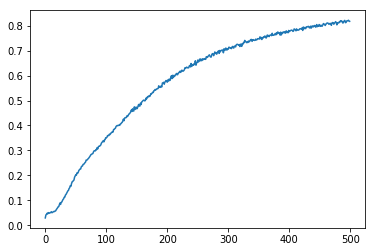

In [28]:
import matplotlib.pyplot as plt
plt.plot(hist.history['acc'])
plt.show()

In [29]:
tokenizer.word_index #1164

{'의': 1,
 '에': 2,
 '을': 3,
 '은': 4,
 '이': 5,
 '한다': 6,
 '·': 7,
 '를': 8,
 '법률': 9,
 '는': 10,
 '한': 11,
 '할': 12,
 '정': 13,
 '수': 14,
 '대통령': 15,
 '과': 16,
 '국가': 17,
 '또는': 18,
 '국회': 19,
 '의하여': 20,
 '하는': 21,
 '국민': 22,
 '하여': 23,
 '로': 24,
 '관': 25,
 '있다': 26,
 '때': 27,
 '헌법': 28,
 '그': 29,
 '에는': 30,
 '가': 31,
 '으로': 32,
 '와': 33,
 '모든': 34,
 '바': 35,
 '위': 36,
 '적': 37,
 '하며': 38,
 '하여야': 39,
 '된': 40,
 '아니': 41,
 '기타': 42,
 '가진다': 43,
 '및': 44,
 '장': 45,
 '사항': 46,
 '인': 47,
 '에서': 48,
 '권리': 49,
 '안': 50,
 '된다': 51,
 '필요한': 52,
 '없다': 53,
 '의원': 54,
 '자유': 55,
 '정부': 56,
 '선거': 57,
 '임명': 58,
 '하고': 59,
 '되지': 60,
 '직무': 61,
 '국무총리': 62,
 '경제': 63,
 '의무': 64,
 '조직': 65,
 '자': 66,
 '하': 67,
 '국회의원': 68,
 '임기': 69,
 '의결': 70,
 '공무원': 71,
 '경우': 72,
 '이상': 73,
 '국무위원': 74,
 '대법원': 75,
 '하기': 76,
 '범위': 77,
 '이를': 78,
 '다': 79,
 '될': 80,
 '받지': 81,
 '법관': 82,
 '보호': 83,
 '정책': 84,
 '정당': 85,
 '헌법재판소': 86,
 '재적': 87,
 '회의': 88,
 '항의': 89,
 '관리': 90,
 '진다': 91,
 '노력': 92,
 '보장': 93,
 

In [30]:
reverse_word_map=dict(map(reversed,tokenizer.word_index.items()))
len(reverse_word_map)

1164

In [31]:
word_list

['대한민국', '의', '국민', '이', '되는', '요건', '은', '법률', '로', '정한', '다', '.']

In [32]:
x=sequence.pad_sequences([[tokenizer.word_index[w] for w in word_list[:2]]], maxlen=maxlen)
x

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [33]:
tokenizer.word_index["의"]

1

In [34]:
model.predict(x)

array([[3.5212423e-07, 2.9188622e-04, 5.0965900e-04, ..., 1.4921687e-05,
        1.7611997e-07, 3.7149621e-05]], dtype=float32)

In [35]:
np.shape(model.predict(x))

(1, 1165)

In [36]:
p=model.predict(x)[0]
p

array([3.5212423e-07, 2.9188622e-04, 5.0965900e-04, ..., 1.4921687e-05,
       1.7611997e-07, 3.7149621e-05], dtype=float32)

In [37]:
np.argmax(p)

441

In [0]:
idx=np.flip(np.argsort(p),0)

In [39]:
for i in idx[:5]:
  print(reverse_word_map[i])

영토
주권
자백
모든
경


#### 사용자 정의 함수 생성

In [0]:
def predict_word(i,n=1):
  
predict_word(1, n=3)
#n: 가장 확률이 높은 3개 단어 출력
#1: 첫번째 단어
# predict_word(1, n=3)
대한민국 의(62%)
         은(30%)
         헌법(2%)
# predict_word(2, n=3)
대한민국 의 영토(20%)
            국민(15%)
            주권(12%)

In [0]:
def predict_word(i,n=1):
  x=sequence.pad_sequences(
  [[tokenizer.word_index[w] for w in word_list[:i]]], maxlen=maxlen)
  p=model.predict(x)[0]
  idx=np.flip(np.argsort(p),0)
  for j in idx[:n]:
    print('"'," ".join(word_list[:i]), '"', reverse_word_map[j],"(p = {:4.2f}%)".format(100*p[j]))
   


In [43]:
predict_word(3, n=3)

" 대한민국 의 국민 " 은 (p = 39.76%)
" 대한민국 의 국민 " 이 (p = 35.85%)
" 대한민국 의 국민 " 경제 (p = 7.01%)
